<a href="https://colab.research.google.com/github/usshaa/Colabnb/blob/main/01_Model_Behavior_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Model Behavior in Deep Learning**

### Learning Goals:

1. Understand **Underfitting** and **Overfitting**
2. Fix overfitting using:

   * **Dropout**
   * **EarlyStopping**
   * **Batch Normalization**


We'll use a **Sequential ANN** with the **Breast Cancer dataset** and:

* Vary architecture/epochs to demonstrate **underfitting vs overfitting**
* Then apply **regularization techniques**


### Step 0: Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

### Step 1: Load and Preprocess Dataset

In [44]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [45]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 2: UNDERFITTING

In [48]:
model_underfit = Sequential()
model_underfit.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu'))
model_underfit.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model_underfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history_underfit = model_underfit.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

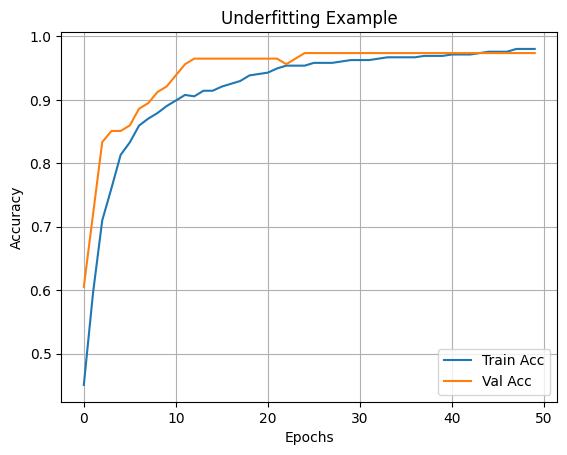

In [51]:
# Plot
plt.plot(history_underfit.history['accuracy'], label='Train Acc')
plt.plot(history_underfit.history['val_accuracy'], label='Val Acc')
plt.title("Underfitting Example")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 3: OVERFITTING

In [52]:
model_overfit = Sequential()
model_overfit.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_overfit.add(Dense(64, activation='relu'))
model_overfit.add(Dense(32, activation='relu'))
model_overfit.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model_overfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history_overfit = model_overfit.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

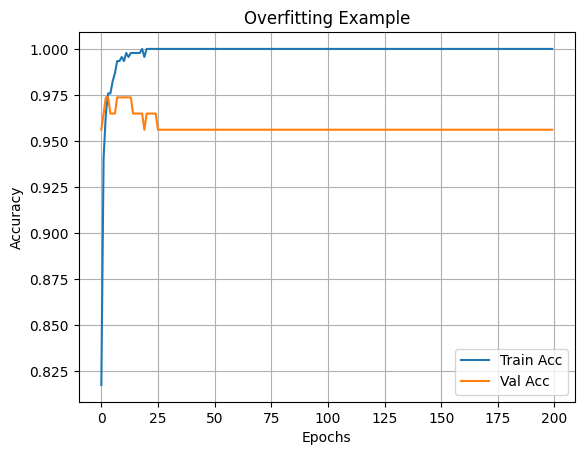

In [55]:
# Plot
plt.plot(history_overfit.history['accuracy'], label='Train Acc')
plt.plot(history_overfit.history['val_accuracy'], label='Val Acc')
plt.title("Overfitting Example")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: APPLY **DROPOUT** to fix Overfitting

In [56]:
model_dropout = Sequential()
model_dropout.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dense(1, activation='sigmoid'))

In [57]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

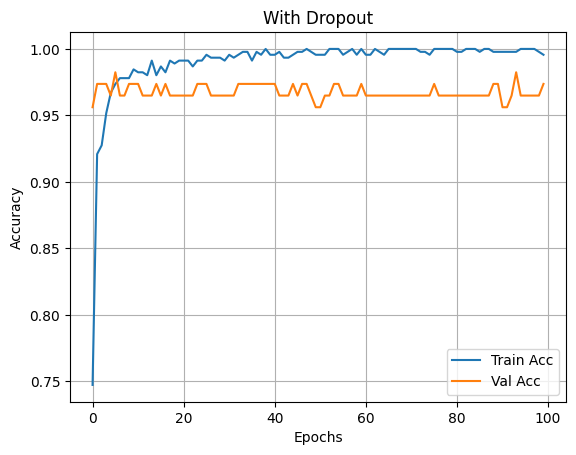

In [59]:
# Plot
plt.plot(history_dropout.history['accuracy'], label='Train Acc')
plt.plot(history_dropout.history['val_accuracy'], label='Val Acc')
plt.title("With Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 5: APPLY **EarlyStopping** to prevent overfitting

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [61]:
model_earlystop = Sequential()
model_earlystop.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_earlystop.add(Dense(64, activation='relu'))
model_earlystop.add(Dense(32, activation='relu'))
model_earlystop.add(Dense(1, activation='sigmoid'))

In [62]:
model_earlystop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history_earlystop = model_earlystop.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=0
)

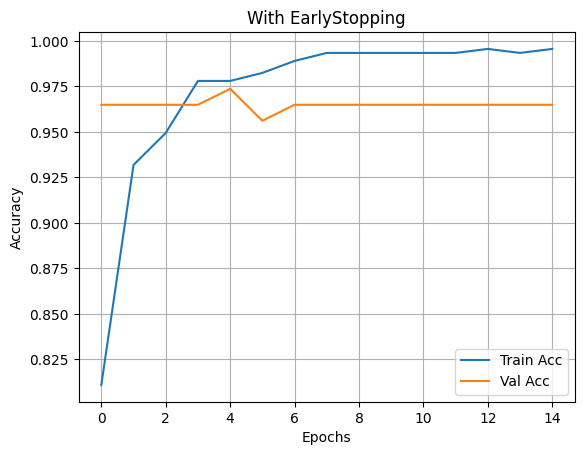

In [64]:
# Plot
plt.plot(history_earlystop.history['accuracy'], label='Train Acc')
plt.plot(history_earlystop.history['val_accuracy'], label='Val Acc')
plt.title("With EarlyStopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: APPLY **BatchNormalization**

In [65]:
model_batchnorm = Sequential()
model_batchnorm.add(Dense(128, input_shape=(X_train.shape[1],)))
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(64, activation='relu'))
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(32, activation='relu'))
model_batchnorm.add(Dense(1, activation='sigmoid'))

In [66]:
model_batchnorm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history_batchnorm = model_batchnorm.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

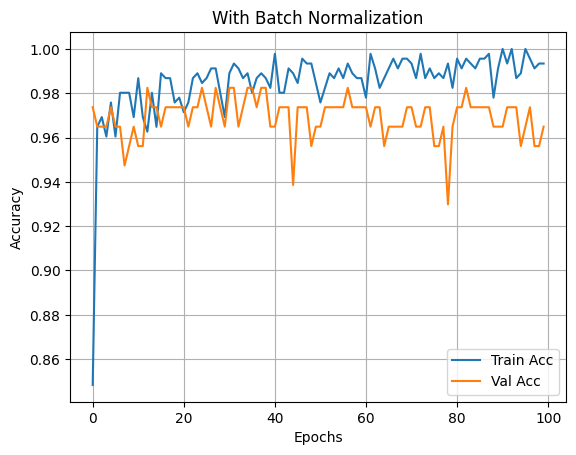

In [68]:
# Plot
plt.plot(history_batchnorm.history['accuracy'], label='Train Acc')
plt.plot(history_batchnorm.history['val_accuracy'], label='Val Acc')
plt.title("With Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Final Summary

In [69]:
from tabulate import tabulate

In [70]:
results = [
    ["Underfit Model", max(history_underfit.history['val_accuracy'])],
    ["Overfit Model", max(history_overfit.history['val_accuracy'])],
    ["With Dropout", max(history_dropout.history['val_accuracy'])],
    ["With EarlyStopping", max(history_earlystop.history['val_accuracy'])],
    ["With BatchNormalization", max(history_batchnorm.history['val_accuracy'])]
]

In [71]:
print(tabulate(results, headers=["Model", "Best Validation Accuracy"], tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════════════════╕
│ Model                   │   Best Validation Accuracy │
╞═════════════════════════╪════════════════════════════╡
│ Underfit Model          │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ Overfit Model           │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ With Dropout            │                   0.982456 │
├─────────────────────────┼────────────────────────────┤
│ With EarlyStopping      │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ With BatchNormalization │                   0.982456 │
╘═════════════════════════╧════════════════════════════╛
